$H=-J_1\sum_{j=1}^{L-1}c^{\dagger}_j c_{j+1}-J_2\sum_{j=1}^{L-1}a^{\dagger}_j a_{j+1}+h.c.$

$+U\sum_{j=1}^{L}c^{\dagger}_{j}c_j a^{\dagger}_{j}a_j$

$+V\sum_{j=2}^{L}a^{\dagger}_{j}a_j c^{\dagger}_{j-1}c_{j-1}+ 
 V\sum_{j=1}^{L-1}a^{\dagger}_{j}a_j c^{\dagger}_{j+1}c_{j+1}+H_{bias}$
 
$H_{bias}=bias\sum_{l=1}^{L}\left(\frac{l}{L}\right)c^{\dagger}_{l}c_{l}$ 


    J1=1.0   J2=0.2    U= 1.0    bias=0 V=0 

In [17]:
from quspin.operators import hamiltonian
from quspin.basis import tensor_basis,spinless_fermion_basis_1d
import numpy as np
import time
#
# parameters of the model 
#
L=10 # system size
J1=1.0 # hopping 1
J2=0.2 # hopping 2
U= 1.0 #repulsion
bias=0 #bias term
#
# construct basis 
#
# Here we use tensor basis instead of spinfull fermions 
# it is necessery for getting the reduced density matrix
basis_up = spinless_fermion_basis_1d(L,Nf=int(L/2-1))  #(L/2-1) fermions and 1 impurity
basis_down = spinless_fermion_basis_1d(L,Nf=1)
basis = tensor_basis(basis_up,basis_down)
#
#construct Hamiltonian
#
H1_pm=[[-J1,i,(i+1)] for i in range(L-1)] 
H2_pm=[[-J2,i,(i+1)] for i in range(L-1)] 
H1_mp=[[+J1,i,(i+1)] for i in range(L-1)] 
H2_mp=[[+J2,i,(i+1)] for i in range(L-1)] 
H_nn=[[U,i,i] for i in range(L)]
H_bias=[[bias*(i+1)/L,i] for i in range(L)]
#
#Hamiltonian
static=[["+-|",H1_pm],["-+|",H1_mp],["|+-",H2_pm],["|-+",H2_mp],["n|n", H_nn],["n|", H_bias]]
H = hamiltonian(static,[],dtype=np.float64,basis=basis,check_pcon=False,check_symm=False)

start_time = time.time() 
#E=H.eigvalsh() # compute only spectrum
E,V=H.eigh()
end_time = time.time()
print(E)
print("time=",end_time-start_time)

Hermiticity check passed!
[-5.80334773 -5.76216806 -5.69732648 ...  6.52121635  6.58838066
  6.63047529]
time= 2.7515392303466797


In [18]:
#
# modified discrete Fourier transform
#
def dft(x, d1=None):
    d=len(x) # d must be odd
    s=int((d-1)/2)
    
    if d1 is None:
        d1 = d
        
    res = np.sum(x*np.exp(2*np.pi*1j*np.outer(np.arange(-s,s+1),np.arange(-s,s+1))/d1), axis=1)
    return res
#
# discrete Wigner function
#
def Wig(rho):
    d=len(rho) # the Hilbert space dimension
    if d%2==1:
        W=np.zeros([d,d])
    else:
        W=np.zeros([d+1,d])
    
    # loop over all diagonals
    for i in range(-d+1,d,2):
        m=int((i+d-1)/2)
        x=rho[::-1,:].diagonal(i)
        while(len(x)<d):
            x=np.pad(x, (1, 1),'constant', constant_values=(0, 0))
        W[:,m]=dft(x).real
    
    return W/d
    
# Negativity = sum of negative entries of a given matrix
    
def Neg(a):
    return np.sum(np.abs(a)-a)

In [21]:
#
# calculate negative value of discrete Wigner function (negativity)
#

negative_list=[] 
for k in range(len(E)):
    rho=basis.partial_trace(V[:,k],sub_sys_A='left',return_rdm='B')
    W=Wig(rho)
    negative=Neg(W)
    negative_list.append(negative)        


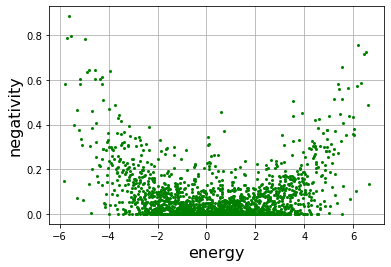

In [24]:
#
# plot
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(E,negative_list, marker='o', color='green',linestyle='None', markersize=2)#,label='gc={0:3.1f}'.format(0.0))

plt.grid()
plt.xlabel('energy', fontsize=16)
plt.ylabel('negativity',fontsize=16)
plt.show()   

# L=10

Hermiticity check passed!
[-6.17429648 -6.13989301 -6.08563127 ...  6.84576348  6.90208685
  6.93709728]
time= 8.576858043670654


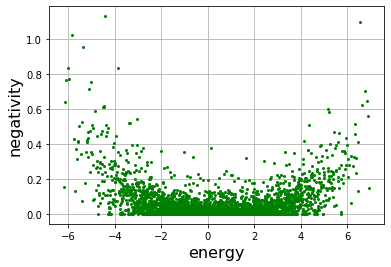

In [25]:
L=11 # system size
J1=1.0 # hopping 1
J2=0.2 # hopping 2
U= 1.0 #repulsion
bias=0 #bias term
#
# construct basis 
#
# Here we use tensor basis instead of spinfull fermions 
# it is necessery for getting the reduced density matrix
basis_up = spinless_fermion_basis_1d(L,Nf=int(L/2-1))  #(L/2-1) fermions and 1 impurity
basis_down = spinless_fermion_basis_1d(L,Nf=1)
basis = tensor_basis(basis_up,basis_down)
#
#construct Hamiltonian
#
H1_pm=[[-J1,i,(i+1)] for i in range(L-1)] 
H2_pm=[[-J2,i,(i+1)] for i in range(L-1)] 
H1_mp=[[+J1,i,(i+1)] for i in range(L-1)] 
H2_mp=[[+J2,i,(i+1)] for i in range(L-1)] 
H_nn=[[U,i,i] for i in range(L)]
H_bias=[[bias*(i+1)/L,i] for i in range(L)]
#
#Hamiltonian
static=[["+-|",H1_pm],["-+|",H1_mp],["|+-",H2_pm],["|-+",H2_mp],["n|n", H_nn],["n|", H_bias]]
H = hamiltonian(static,[],dtype=np.float64,basis=basis,check_pcon=False,check_symm=False)

start_time = time.time() 
#E=H.eigvalsh() # compute only spectrum
E,V=H.eigh()
end_time = time.time()
print(E)
print("time=",end_time-start_time)

#
# calculate negative value of discrete Wigner function (negativity)
#

negative_list=[] 
for k in range(len(E)):
    rho=basis.partial_trace(V[:,k],sub_sys_A='left',return_rdm='B')
    W=Wig(rho)
    negative=Neg(W)
    negative_list.append(negative)        

#
# plot
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(E,negative_list, marker='o', color='green',linestyle='None', markersize=2)#,label='gc={0:3.1f}'.format(0.0))

plt.grid()
plt.xlabel('energy', fontsize=16)
plt.ylabel('negativity',fontsize=16)
plt.show()   

# L=11

Hermiticity check passed!
[-7.10787732 -7.07772393 -7.02882163 ...  7.88081043  7.93087878
  7.96159902]
time= 156.3827748298645


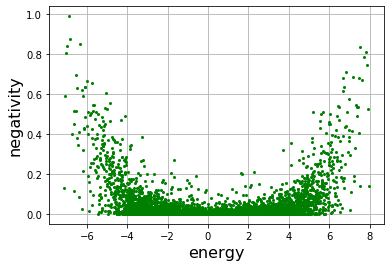

In [26]:
L=12 # system size
J1=1.0 # hopping 1
J2=0.2 # hopping 2
U= 1.0 #repulsion
bias=0 #bias term
#
# construct basis 
#
# Here we use tensor basis instead of spinfull fermions 
# it is necessery for getting the reduced density matrix
basis_up = spinless_fermion_basis_1d(L,Nf=int(L/2-1))  #(L/2-1) fermions and 1 impurity
basis_down = spinless_fermion_basis_1d(L,Nf=1)
basis = tensor_basis(basis_up,basis_down)
#
#construct Hamiltonian
#
H1_pm=[[-J1,i,(i+1)] for i in range(L-1)] 
H2_pm=[[-J2,i,(i+1)] for i in range(L-1)] 
H1_mp=[[+J1,i,(i+1)] for i in range(L-1)] 
H2_mp=[[+J2,i,(i+1)] for i in range(L-1)] 
H_nn=[[U,i,i] for i in range(L)]
H_bias=[[bias*(i+1)/L,i] for i in range(L)]
#
#Hamiltonian
static=[["+-|",H1_pm],["-+|",H1_mp],["|+-",H2_pm],["|-+",H2_mp],["n|n", H_nn],["n|", H_bias]]
H = hamiltonian(static,[],dtype=np.float64,basis=basis,check_pcon=False,check_symm=False)

start_time = time.time() 
#E=H.eigvalsh() # compute only spectrum
E,V=H.eigh()
end_time = time.time()
print(E)
print("time=",end_time-start_time)

#
# calculate negative value of discrete Wigner function (negativity)
#

negative_list=[] 
for k in range(len(E)):
    rho=basis.partial_trace(V[:,k],sub_sys_A='left',return_rdm='B')
    W=Wig(rho)
    negative=Neg(W)
    negative_list.append(negative)        

#
# plot
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(E,negative_list, marker='o', color='green',linestyle='None', markersize=2)#,label='gc={0:3.1f}'.format(0.0))

plt.grid()
plt.xlabel('energy', fontsize=16)
plt.ylabel('negativity',fontsize=16)
plt.show()   